# Notebook to explore the predictions of the model


In [1]:
# Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import os

import scipy as sc
import properscoring as ps
from scipy.stats import norm
# xskillscore

import xarray as xr
import xskillscore as xs
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [11]:
sequence_number = 0
run_type = 'calibration'
eval_type = 'standard'
userpath = '/Users/havardhegre1'
path = f'{userpath}/views-platform/views-models/models/purple_haze/data/generated'
predictions_full_df = pd.read_parquet(f'{path}/final_pred_full_{run_type}_{eval_type}_{sequence_number}.parquet')
predictions_agg_df = pd.read_parquet(f'{path}/final_preds_{run_type}_{eval_type}_{sequence_number}_agg.parquet')


# Functions

In [ ]:
def compute_coverage(model,steps,df):
    print('notebook version')
    model['covered_across'] = 0
    model['covered_nonzeros_across'] = 0
    for step in steps:
        df['observed'] = df['ln_ged_sb_dep']['mean']
        df[f'step_{step}_p10'] = df[f'step_pred_{step}']['10%']
        df[f'step_{step}_p90'] = df[f'step_pred_{step}']['90%']
        df[f'covered_step_{step}'] = 1
        df.loc[(df[f'step_{step}_p10']>df['observed']) | (df[f'step_{step}_p90']<df['observed']), f'covered_step_{step}'] = 0
        model[f'covered_step_{step}'] = df[f'covered_step_{step}'].mean()
        threshold = 0
        model[f'covered_nonzeros_step_{step}'] = df.loc[df['observed']>np.log1p(threshold)][f'covered_step_{step}'].mean()
        model['covered_across'] = model['covered_across'] + model[f'covered_step_{step}']
        model['covered_nonzeros_across'] = model['covered_nonzeros_across'] + model[f'covered_nonzeros_step_{step}']
    model['covered_across'] = model['covered_across']/len(steps)
    model['covered_nonzeros_across'] = model['covered_nonzeros_across']/len(steps)
    return df

# Inspect the predictions

In [12]:
predictions_agg_df.describe()

,step_combined
count,6876.000000
mean,11.286532
std,157.537532
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,7664.000000


In [13]:
predictions_agg_df.head()

step_combined
month_id country_id               
397      1                     0.0
         2                     0.0
         3                     0.0
         4                     0.0
         5                     0.0

In [14]:

predictions_full_df.describe()

,step_combined,submodel
count,27504.000000,27504.000000
mean,11.286532,0.500000
std,168.988671,0.500009
min,-0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.500000
75%,0.000000,1.000000
max,9661.000000,1.000000


In [6]:
predictions_full_df.tail(20)

step_combined  submodel
month_id country_id draw                         
432      205        3          0.000000         1
         206        3          0.000000         1
         209        3          0.000000         1
         213        3          0.333333         1
         214        3          0.000000         1
         218        3          0.000000         1
         220        3          0.000000         1
         222        3         -0.000000         1
         223        3         24.000000         1
         231        3          0.000000         1
         232        3          0.000000         1
         233        3          0.000000         1
         234        3          0.000000         1
         235        3          0.000000         1
         237        3         37.333333         1
         242        3          0.000000         1
         243        3          0.000000         1
         244        3          0.000000         1
         245        3          0.666667         1
         246        3         20.666667         1

Country: 70
count    4.000000
mean     2.500000
std      1.753304
min      0.000000
25%      2.000000
50%      3.000000
75%      3.500000
max      4.000000
Name: step_combined, dtype: float64


/var/folders/bz/1cx7kmbj2919xmdqxy83mbs80000gp/T/ipykernel_74126/3605983241.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(predictions_full_df['step_combined'].loc[month, country].describe())
/var/folders/bz/1cx7kmbj2919xmdqxy83mbs80000gp/T/ipykernel_74126/3605983241.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(predictions_full_df['step_combined'].loc[month, country].hist(bins=50))


Axes(0.125,0.11;0.775x0.77)
Country: 245
count     4.000000
mean     15.500000
std       1.732051
min      13.000000
25%      15.250000
50%      16.000000
75%      16.250000
max      17.000000
Name: step_combined, dtype: float64
Axes(0.125,0.11;0.775x0.77)
Country: 246
count     4.000000
mean     23.000000
std      17.776389
min       0.000000
25%      17.500000
50%      24.333333
75%      29.833333
max      43.333333
Name: step_combined, dtype: float64
Axes(0.125,0.11;0.775x0.77)


/var/folders/bz/1cx7kmbj2919xmdqxy83mbs80000gp/T/ipykernel_74126/3605983241.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(predictions_full_df['step_combined'].loc[month, country].describe())
/var/folders/bz/1cx7kmbj2919xmdqxy83mbs80000gp/T/ipykernel_74126/3605983241.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(predictions_full_df['step_combined'].loc[month, country].hist(bins=50))
/var/folders/bz/1cx7kmbj2919xmdqxy83mbs80000gp/T/ipykernel_74126/3605983241.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(predictions_full_df['step_combined'].loc[month, country].describe())
/var/folders/bz/1cx7kmbj2919xmdqxy83mbs80000gp/T/ipykernel_74126/3605983241.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(predictions_full_df['step_combined'].loc[month, country].hist(bins=50))


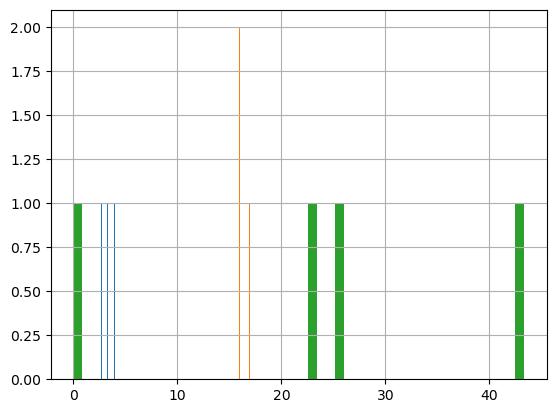

In [7]:
# inspect predictions for a specific country and month  
month = 397
for country in [70,245, 246]:
    print(f'Country: {country}')
    print(predictions_full_df['step_combined'].loc[month, country].describe())
    print(predictions_full_df['step_combined'].loc[month, country].hist(bins=50))

In [8]:
predictions_full_df.loc[month, 245].head()


/var/folders/bz/1cx7kmbj2919xmdqxy83mbs80000gp/T/ipykernel_74126/3380200236.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  predictions_full_df.loc[month, 245].head()


,step_combined,submodel
draw,,
0,17.0,0
1,13.0,0
2,16.0,1
3,16.0,1


In [9]:
predictions_full_df.loc[month]


,,step_combined,submodel
country_id,draw,,
1,0,0.000000,0
2,0,0.000000,0
3,0,0.000000,0
4,0,0.000000,0
5,0,0.000000,0
...,...,...,...
242,3,0.000000,1
243,3,0.000000,1
244,3,0.000000,1


In [10]:
sigma=0.3
pred_samples = 1

predictions_full_df['newsample'] = np.where(predictions_full_df['step_combined']>0, np.round(np.random.lognormal(np.log1p(predictions_full_df['step_combined'],pred_samples), sigma)-1), 0)
                               

TypeError: 'int' object does not support item assignment

In [ ]:
predictions_full_df

# Mapping

In [ ]:
import plotly.express as px

step_to_plot = 12
percentile_to_plot = '50%'
month_to_plot = partition['predict'][1] 
col_to_plot = percentile_to_plot + '_percentile'
df_plot[col_to_plot] = df_plot[(f'step_pred_{step_to_plot}', percentile_to_plot)]
if log_outcome:
    range = [0,8]
else:
    range = [0,2000]

fig = px.choropleth(df_plot.loc[month_to_plot], locations="isoab",
                    color=col_to_plot, 
                    hover_name="country_name", # column to add to hover information
                    hover_data=["Index"],
                    color_continuous_scale=px.colors.sequential.Rainbow,
                    range_color=range,
                    projection="mollweide",
                    title='Predictions, ' + percentile_to_plot + ' percentile, month ' + str(month_to_plot) + ', step ' + str(step_to_plot)
                    )
fig.update_layout(margin=dict(l=0, r=0, t=25, b=0),                
                  legend=dict(
                      yanchor="bottom",
                      y=0.99,
                      xanchor="left",
                      x=0.01))
fig.show()
filename = figures_path + 'prediction_map_s' + str(step_to_plot) + '_perc' + percentile_to_plot + '_m' + str(month_to_plot) + '.html'
fig.write_html(filename)
#fig.write_image(figures_path + 'prediction_map_s' + str(step_to_plot) + '_perc' + percentile_to_plot + '_m' + str(month_to_plot) + '.png')
#df.loc[480,220].head()
